로지스틱 회귀 정확도: 1.0000

📌 분류 리포트:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


📌 혼동 행렬:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


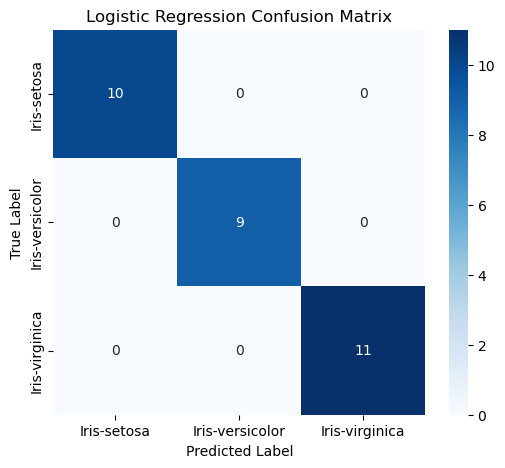

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  #로지스틱 회귀 모델을 생성
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 데이터 불러오기
file_path = "C:\\Users\\LG\\Downloads\\iris.csv" 
df = pd.read_csv(file_path)

# 특성과 타겟 변수 분리
X = df.iloc[:, :-1]  # 'SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'  #마지막 열을 제외한 나머지 열을 입력 변수로 설정
y = df.iloc[:, -1]   # 마지막 열을 타겟 변수로 설정

# 데이터 분할 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  #random_state=42: 실행할 때마다 같은 결과

# 로지스틱 회귀 모델 생성 및 학습
lr_model = LogisticRegression(max_iter=200, random_state=42)   #최대 반복 횟수를 200으로 설정
lr_model.fit(X_train, y_train)  #학습

# 예측 수행
y_pred = lr_model.predict(X_test)   #예측한 품종을 저장

# 정확도 및 분류 리포트 출력
accuracy = accuracy_score(y_test, y_pred)  #예측한 품종과 실제 품종을 비교하여 정확도 계산
print(f"로지스틱 회귀 정확도: {accuracy:.4f}")

print("\n📌 분류 리포트:")
print(classification_report(y_test, y_pred))

# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_test, y_pred)   #혼동행렬 생성-모델이 실제 정답과 얼마나 일치하는지 보여주는 표
print("\n📌 혼동 행렬:")
print(conf_matrix)

# 혼동 행렬 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=df["Name"].unique(), yticklabels=df["Name"].unique())  #히트맵으로 시각화, 숫자로 표시, 색상, 정수로 표시
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Logistic Regression Confusion Matrix")
plt.show()